In [2]:
pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "

In [4]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as T

class OLIVESDataset(Dataset):
    """
    A PyTorch Dataset for the OLIVES data.
    Including image, six binary biomarker labels,
    and other features for each sample.
    """
    def __init__(self, hf_dataset, transform=None):
        """
        Args:
            hf_dataset (Dataset):
              dataset['train']/dataset['test']
            transform (optional):
              A function/transform to apply to the images.
        """
        self.hf_dataset = hf_dataset
        self.transform = transform

    def __getitem__(self, idx):
        """
        Args:
            idx (int): Index of the sample within this Dataset.

        Returns:
            tuple: (image_tensor, numeric_tensor, label_tensor)
            - image_tensor: The transformed image (CHW format).
            - numeric_tensor: A tensor containing numeric features such as BCVA and CST.
            - label_tensor: A tensor of shape (6,) containing the six biomarker labels.
        """
        sample = self.hf_dataset[idx]

        image = sample["Image"]
        # Apply Transformer
        if self.transform is not None:
            image = self.transform(image)

        # Biomarkers
        labels = torch.zeros(6, dtype=torch.float64)

        biomarker_keys = ["B1", "B2", "B3", "B4", "B5", "B6"]
        for i, key in enumerate(biomarker_keys):
            val = sample.get(key, None)
            if val is not None:
                # If val is 1 or 0, overwrite the default 0
                labels[i] = val
            else:
                pass

        # BCVA and CST.
        bcva = sample["BCVA"]
        cst  = sample["CST"]

        if bcva is None:
            bcva = -1
        if cst is None:
            cst = -1
        # I do the check because Patient ID #79 has missing BCVA and CST and some might has missing labels
        extra_features = torch.tensor([bcva, cst], dtype=torch.float64)

        return image, labels, extra_features

    def __len__(self):
        return len(self.hf_dataset)

In [5]:
if __name__ == "__main__":
    from datasets import load_dataset
    from torch.utils.data import DataLoader

    olives = load_dataset("gOLIVES/OLIVES_Dataset", "biomarker_detection")

    # resize and convert to tensor
    # Feel free to add more
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor()
    ])

    train_dataset = OLIVESDataset(hf_dataset=olives["train"], transform=transform)
    test_dataset  = OLIVESDataset(hf_dataset=olives["test"], transform=transform)

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=True)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

train-00000-of-00032.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

train-00001-of-00032.parquet:   0%|          | 0.00/513M [00:00<?, ?B/s]

train-00002-of-00032.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

train-00003-of-00032.parquet:   0%|          | 0.00/501M [00:00<?, ?B/s]

train-00004-of-00032.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00005-of-00032.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00006-of-00032.parquet:   0%|          | 0.00/505M [00:00<?, ?B/s]

train-00007-of-00032.parquet:   0%|          | 0.00/476M [00:00<?, ?B/s]

train-00008-of-00032.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

train-00009-of-00032.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

train-00010-of-00032.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00011-of-00032.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

train-00012-of-00032.parquet:   0%|          | 0.00/508M [00:00<?, ?B/s]

train-00013-of-00032.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00014-of-00032.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00015-of-00032.parquet:   0%|          | 0.00/483M [00:00<?, ?B/s]

train-00016-of-00032.parquet:   0%|          | 0.00/462M [00:00<?, ?B/s]

train-00017-of-00032.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

train-00018-of-00032.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00019-of-00032.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

train-00020-of-00032.parquet:   0%|          | 0.00/492M [00:00<?, ?B/s]

train-00021-of-00032.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

train-00022-of-00032.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

train-00023-of-00032.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00024-of-00032.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00025-of-00032.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

train-00026-of-00032.parquet:   0%|          | 0.00/294M [00:00<?, ?B/s]

train-00027-of-00032.parquet:   0%|          | 0.00/429M [00:00<?, ?B/s]

train-00028-of-00032.parquet:   0%|          | 0.00/474M [00:00<?, ?B/s]

train-00029-of-00032.parquet:   0%|          | 0.00/323M [00:00<?, ?B/s]

train-00030-of-00032.parquet:   0%|          | 0.00/432M [00:00<?, ?B/s]

train-00031-of-00032.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

test-00000-of-00002.parquet:   0%|          | 0.00/430M [00:00<?, ?B/s]

test-00001-of-00002.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/78822 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3871 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/38 [00:00<?, ?it/s]

In [8]:
# First one is for the train dataset with length 78822
# Second is for test dataset
print(olives)

# All in tensor
print("Loader Structure: Image, 6 biomarkers, bcva & cst")
print(train_dataset[0])

DatasetDict({
    train: Dataset({
        features: ['Image', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'BCVA', 'CST', 'Eye_ID', 'Patient_ID'],
        num_rows: 78822
    })
    test: Dataset({
        features: ['Image', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'BCVA', 'CST', 'Eye_ID', 'Patient_ID'],
        num_rows: 3871
    })
})
Loader Structure: Image, 6 biomarkers, bcva & cst
(tensor([[[0.0118, 0.0078, 0.0157,  ..., 0.0157, 0.0157, 0.0275],
         [0.0078, 0.0118, 0.0157,  ..., 0.0275, 0.0392, 0.0196],
         [0.0784, 0.0745, 0.0235,  ..., 0.0314, 0.0471, 0.0275],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]), tensor([1., 0., 1., 1., 0., 1.], dtype=torch.float64), tensor([ 82., 326.], dtype=torch.float64))


In [9]:
for image, label, extra in train_loader:
        print("Image batch shape:", image.shape)       # Image
        print("Numeric features:", extra.shape)       # BCVA & CST
        print("Labels:", label.shape)             # Lables
        break

Image batch shape: torch.Size([16, 1, 224, 224])
Numeric features: torch.Size([16, 2])
Labels: torch.Size([16, 6])


Image batch shape: torch.Size([16, 1, 224, 224])
Numeric features shape: torch.Size([16, 6])
Labels shape: torch.Size([16, 2])


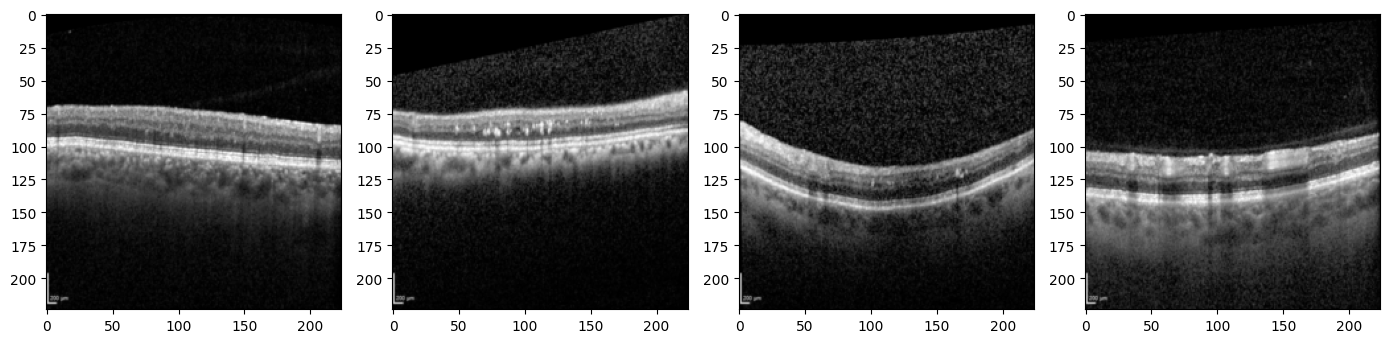

In [15]:
import matplotlib.pyplot as plt

def show_images(images, n=4):
    """
    Display the first n images in a batch.
    """
    # Create a row of subplots.
    fig, axes = plt.subplots(1, n, figsize=(3.5*n, 3.5))

    for i in range(n):
        # [C, H, W] -> [H, W, C] so matplotlib can show correctly.
        img = images[i].permute(1, 2, 0).cpu().numpy()

        axes[i].imshow(img[..., 0], cmap='gray')

    plt.tight_layout()
    plt.show()

# Example
images, extra, labels = next(iter(train_loader))
print("Image batch shape:", images.shape)
print("Numeric features shape:", extra.shape)
print("Labels shape:", labels.shape)

# Display the first 4 images in batch
show_images(images, n=4)
